In [1]:
import numpy as np
import pandas as pd

main_df=pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-3 Linear Models\Employee Exit Prediction\Employee_Exit.csv")
main_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
#Numerical Analysis

In [3]:
main_df.shape

(14999, 10)

In [4]:
main_df.size

149990

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
main_df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
main_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
main_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
#Loading our Employee Satisfaction Data

In [10]:
main_df[main_df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


In [11]:
main_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
main_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
main_df.fillna(main_df.mean(),inplace=True) # fill with mode for low variance

C:\Users\91897\AppData\Local\Temp\ipykernel_7064\2379300189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(),inplace=True) # fill with mode for low variance


In [15]:
main_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [16]:
main_df.groupby('sales').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [17]:
main_df.groupby('sales').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [18]:
main_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
#Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


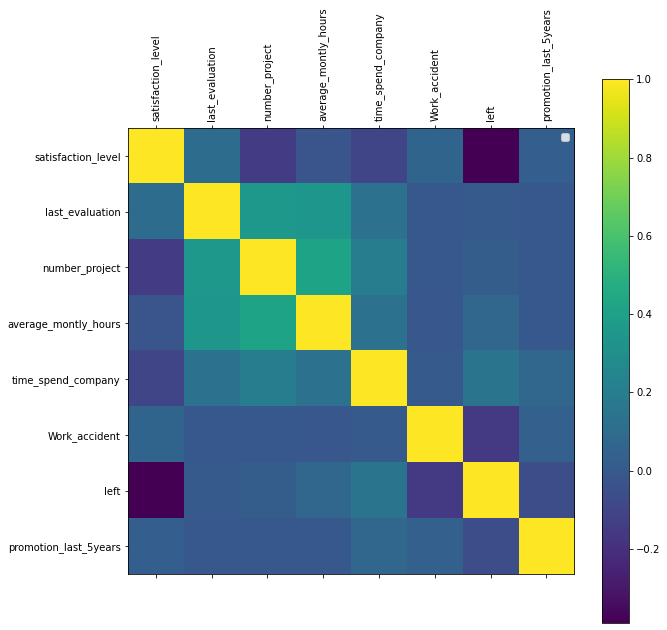

In [20]:
def plot_corr(df,size=10):
    
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.legend()
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    

plot_corr(main_df)

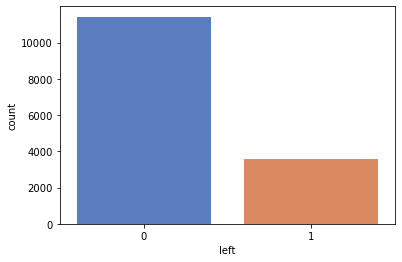

In [21]:
with sns.color_palette('muted'):
    sns.countplot(x=main_df['left'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

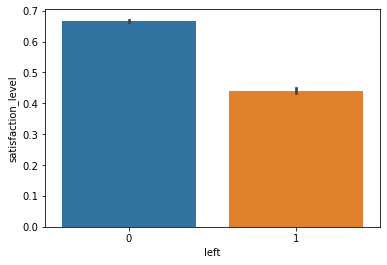

In [22]:
sns.barplot(x='left',y='satisfaction_level',data=main_df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

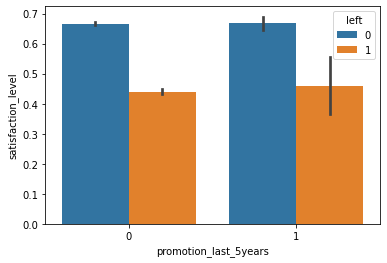

In [23]:
sns.barplot(x='promotion_last_5years',y='satisfaction_level',data=main_df,hue='left')

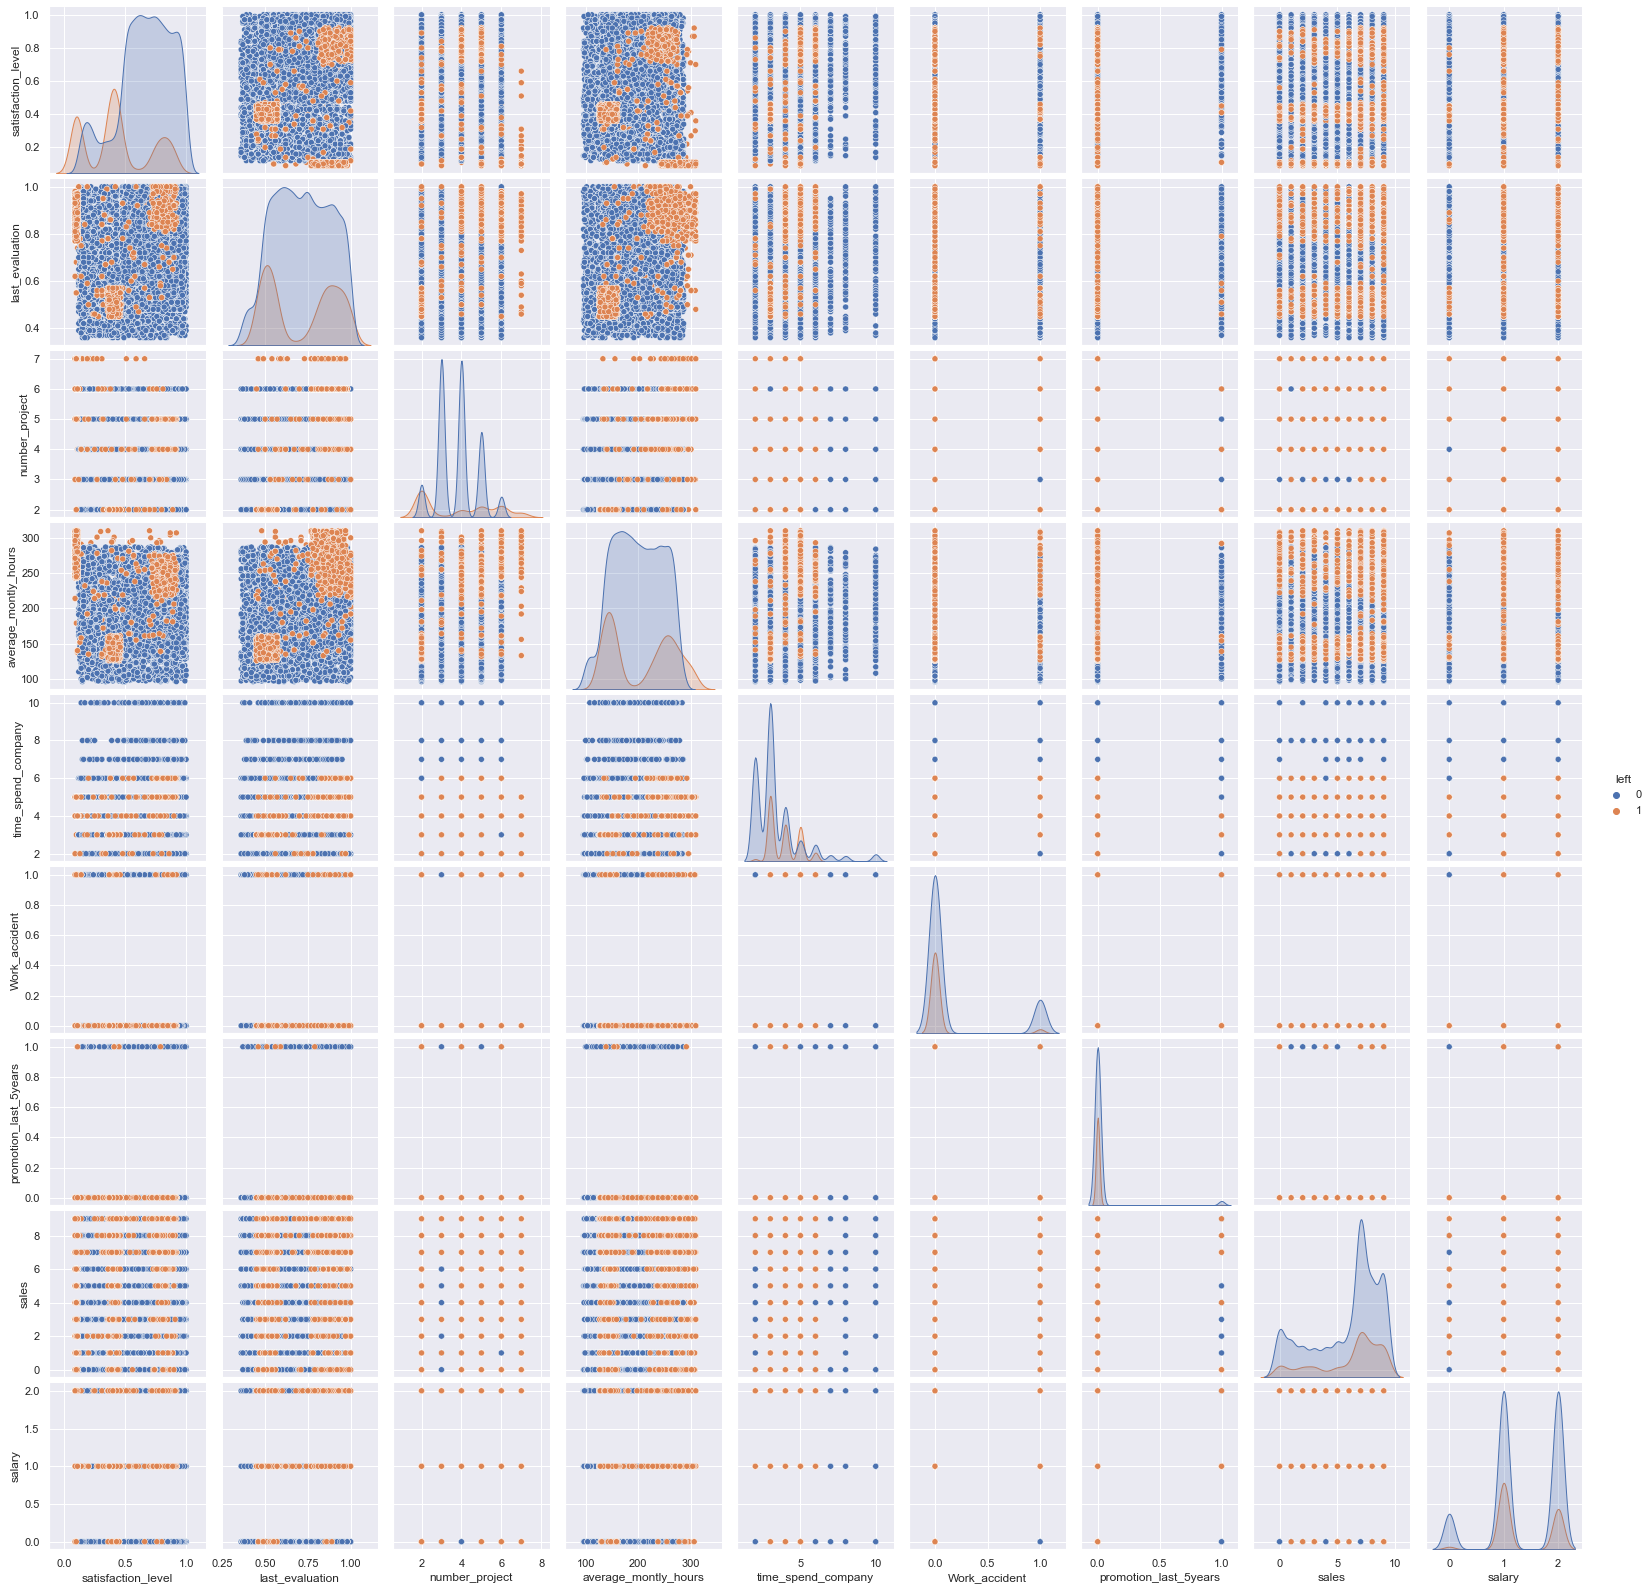

In [58]:
sns.pairplot(main_df,hue='left')

In [ ]:
#Data Preprocessing

In [35]:
y=main_df[['sales','salary']]

In [36]:
y

,sales,salary
0,7,1
1,7,2
2,7,2
3,7,1
4,7,1
...,...,...
14994,8,1
14995,8,1
14996,8,1
14997,8,1


In [37]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

main_df['salary']=le.fit_transform(main_df['salary'])

In [29]:
main_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [30]:
main_df['sales']=le.fit_transform(main_df['sales'])

In [31]:
main_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [32]:
X=main_df.drop(['left'],axis=1)
y = main_df.left

In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=89)
scores_dict = {}

In [ ]:
# Standard Scaler
# Model Classification
# Decision Tree

In [38]:
from sklearn.metrics import accuracy_score, classification_report

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100

In [40]:
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_test,prediction_dt))

Accuracy score :  98.11111111111111
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3432
           1       0.96      0.96      0.96      1068

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [41]:
Catagory=['Employee will stay','Employee will Leave']

In [42]:
custom_dt=[[1,500,3,6,0,0.90,0.89,1,8]]

In [43]:
print(int(dt.predict(custom_dt)))

0


D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [44]:
Catagory[int(dt.predict(custom_dt))]

D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Employee will stay'

In [45]:
dt.feature_importances_

array([4.95962901e-01, 1.44186905e-01, 1.05548066e-01, 9.72079015e-02,
       1.37681014e-01, 1.77734378e-03, 1.56801351e-04, 1.29066140e-02,
       4.57245253e-03])

In [46]:
feature_importance=pd.DataFrame(dt.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)

In [47]:
feature_importance

,Importance
satisfaction_level,0.495963
last_evaluation,0.144187
time_spend_company,0.137681
number_project,0.105548
average_montly_hours,0.097208
sales,0.012907
salary,0.004572
Work_accident,0.001777
promotion_last_5years,0.000157


In [ ]:
#KNN

# Data Processing of KNN

In [48]:
from sklearn.preprocessing import StandardScaler
print(list(main_df.columns))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']


In [50]:
num_features = list(main_df.columns)
for x in ['salary','sales','left']:
    num_features.remove(x)

sc = StandardScaler()

X_train_std=sc.fit_transform(X_train[num_features])
X_test_std=sc.transform(X_test[num_features])

In [51]:
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,26)
scores={}
scores_list=[]
bestk=0
h_score = 0

for i in range(1,26):
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_std,y_train)
    pred = clf.predict(X_test_std)
    scores[i]=accuracy_score(y_test,pred)
    if scores[i]>h_score:
        h_score = scores[i]
        bestk = i
    scores_list.append(scores[i])
print('Best k is {} with score : {}'.format(bestk,h_score))

Best k is 1 with score : 0.9804444444444445


In [52]:
# main model for KNN
knn=KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train_std,y_train)
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [53]:
print('Accuracy score : ',accuracy_knn)
scores_dict['KNeighborsClassifier'] = accuracy_score(y_test,prediction_knn)*100
print(classification_report(y_test,prediction_knn))

Accuracy score :  98.04444444444445
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3432
           1       0.95      0.97      0.96      1068

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



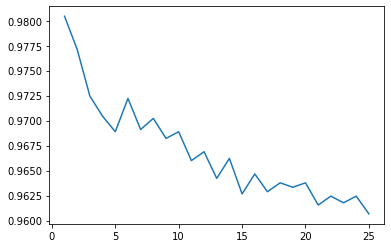

In [54]:
plt.plot(k_range,scores_list)

In [ ]:
# SVM

In [55]:
from sklearn.svm import SVC
model = SVC().fit(X_train_std,y_train)
pred = model.predict(X_test_std)
svc_accuracy = accuracy_score(y_test,pred)*100
print('Accuracy score : ',svc_accuracy)
scores_dict['SVC'] = svc_accuracy
print(classification_report(y_test,pred))

Accuracy score :  96.66666666666667
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3432
           1       0.94      0.92      0.93      1068

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



In [56]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.03,n_estimators=1000).fit(X_train_std,y_train)
pred = model.predict(X_test_std)
LGBM_accuracy = accuracy_score(y_test,pred)*100
print('Accuracy score : ',LGBM_accuracy)
scores_dict['LGBMClassifier'] = LGBM_accuracy

Accuracy score :  99.11111111111111


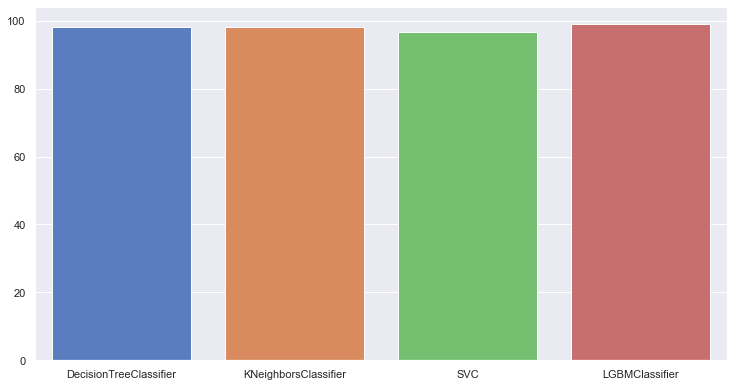

In [57]:
algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.4,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)